# Analysis of IMF World Economic Outlook
## Load Data

In [28]:
import pandas as pd

file_path = "./data.csv"
df = pd.read_csv(file_path, sep=";")

## Overview

### Head

In [29]:
print(df.head())

   WEO Country Code  ISO WEO Subject Code      Country  \
0               512  AFG       NGAP_NPGDP  Afghanistan   
1               914  ALB           PPPGDP      Albania   
2               914  ALB             PCPI      Albania   
3               612  DZA           NGDP_R      Algeria   
4               612  DZA             PCPI      Algeria   

                        Subject Descriptor  \
0   Output gap in percent of potential GDP   
1   Gross domestic product, current prices   
2       Inflation, average consumer prices   
3  Gross domestic product, constant prices   
4       Inflation, average consumer prices   

                                       Subject Notes  \
0  Output gaps for advanced economies are calcula...   
1  These data form the basis for the country weig...   
2  Expressed in averages for the year, not end-of...   
3  Expressed in billions of national currency uni...   
4  Expressed in averages for the year, not end-of...   

                                     

#### Result:
Data is structured in wide format: Each row represents an economic metric for a specific country over many years

### Shape

In [30]:
print(df.shape)

(8775, 56)


#### Result
Is that the ~100k data we need???

### Describe

In [31]:
print(df.describe())

       WEO Country Code          1980          1981          1982  \
count       8775.000000  3.808000e+03  3.952000e+03  3.994000e+03   
mean         553.328205  4.885289e+04  4.592886e+04  4.586402e+04   
std          260.740915  1.215854e+06  1.080641e+06  1.141182e+06   
min          111.000000 -1.130530e+04 -1.057900e+04 -1.100380e+04   
25%          314.000000  7.782500e-01  7.160000e-01  5.140000e-01   
50%          566.000000  1.255750e+01  1.168000e+01  1.061100e+01   
75%          734.000000  9.947725e+01  9.570875e+01  1.000340e+02   
max          968.000000  6.932238e+07  6.100644e+07  6.639857e+07   

               1983          1984          1985          1986          1987  \
count  4.041000e+03  4.072000e+03  4.142000e+03  4.185000e+03  4.204000e+03   
mean   4.757828e+04  4.666190e+04  4.656609e+04  4.472152e+04  4.611228e+04   
std    1.226333e+06  1.094456e+06  1.047599e+06  9.408252e+05  9.557539e+05   
min   -1.191340e+04 -8.389300e+03 -4.667100e+03 -4.865800e+03 

#### Result
Not very useful, as of long format structure of the data

### Missing Values

In [32]:
print(df.isnull().sum())

WEO Country Code                    0
ISO                                 0
WEO Subject Code                    0
Country                             0
Subject Descriptor                  0
Subject Notes                     195
Units                               0
Scale                            4875
Country/Series-specific Notes    1186
1980                             4967
1981                             4823
1982                             4781
1983                             4734
1984                             4703
1985                             4633
1986                             4590
1987                             4571
1988                             4478
1989                             4416
1990                             3920
1991                             3759
1992                             3384
1993                             3180
1994                             3051
1995                             2689
1996                             2545
1997        

#### Result
- Time: Older years have significantly more missing data than the recent years
  - -> MAR as data collection improved over time and some countries may not have existed in the 1980s
- Attributes: Metadata Columns Scale, Subject Notes, Country/Series-specific notes are missing data
  - -> Can be difficult to understand measurement and could lead to measurement bias

### Conclusion
Reshape of Data into long format needed to make it easier to work with.

-> Melting different year columns into single year column and having different years as rows


## Reshape


In [33]:
id_vars = [
    'WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
    'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
    'Country/Series-specific Notes', 'Estimates Start After'
]

df_long = pd.melt(
    df,
    id_vars=id_vars,
    var_name='Year',
    value_name='Value'
)

df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

df_long.dropna(subset=['Value'], inplace=True)

print(df_long.head())

   WEO Country Code  ISO WEO Subject Code              Country  \
1               914  ALB           PPPGDP              Albania   
3               612  DZA           NGDP_R              Algeria   
4               612  DZA             PCPI              Algeria   
5               614  AGO       NGDPRPPPPC               Angola   
8               311  ATG           NGDPPC  Antigua and Barbuda   

                                  Subject Descriptor  \
1             Gross domestic product, current prices   
3            Gross domestic product, constant prices   
4                 Inflation, average consumer prices   
5  Gross domestic product per capita, constant pr...   
8  Gross domestic product per capita, current prices   

                                       Subject Notes  \
1  These data form the basis for the country weig...   
3  Expressed in billions of national currency uni...   
4  Expressed in averages for the year, not end-of...   
5  GDP is expressed in constant internatio

## Relevant Information

In [34]:
print("Amount of countries: ", df_long['Country'].nunique())
print("Metrics represented: ", df_long['Subject Descriptor'].unique())

Amount of countries:  195
Metrics represented:  ['Gross domestic product, current prices'
 'Gross domestic product, constant prices'
 'Inflation, average consumer prices'
 'Gross domestic product per capita, constant prices'
 'Gross domestic product per capita, current prices' 'Employment'
 'Current account balance' 'Volume of exports of goods and services'
 'Volume of exports of goods'
 'Gross domestic product corresponding to fiscal year, current prices'
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total'
 'Population' 'Implied PPP conversion rate'
 'Volume of imports of goods and services' 'Volume of Imports of goods'
 'General government total expenditure'
 'General government net lending/borrowing'
 'Inflation, end of period consumer prices' 'Gross national savings'
 'Output gap in percent of potential GDP' 'Total investment'
 'General government primary net lending/borrowing' 'Unemployment rate'
 'Gross domestic product, deflator'
 'General gover

## DeepDive Analysis
We decided to make a deep dive analysis for 4 countries (Switzerland, Germany, United States of America, China), because analysis 195 would be to much, and because those 4 are of the most interest in our opinion (upcoming or current economic power, origin/resident country of ourselves)

We also decided to analyze the following 3 metrics for the beginning: Gross domesting product, constant prices; Inflation, average consumer prices; Unemployment rate. Those are the 3 fundamental indicators which are strongly linked and provide therefore a perfect hypothesis-driven basis for robust analysis of correlations.

To correctly analyze the inflation rates, we will calculate the Inflation Rate YoY based on the provided average consumer prices and add it as a row to the dataframe. We will do the same with the GDP growth rate.

In [35]:
countries_to_analyze = ['Switzerland', 'Germany', 'United States', 'China']
subjects_to_analyze = [
    'Gross domestic product, constant prices',
    'Inflation, average consumer prices',
    'Unemployment rate'
]

df_filtered = df_long[
    (df_long['Country'].isin(countries_to_analyze)) &
    (df_long['Subject Descriptor'].isin(subjects_to_analyze))
]

df_inflation_index = df_filtered[
    (df_filtered['Subject Descriptor'] == 'Inflation, average consumer prices') &
    (df_filtered['Units'] == 'Index')
].copy()

df_inflation_index = df_inflation_index.sort_values(by=['Country', 'Year'])

df_inflation_index['Value'] = df_inflation_index.groupby('Country')['Value'].pct_change() * 100
df_inflation_index['Subject Descriptor'] = 'Inflation Rate (YoY)'
df_inflation_index['Units'] = 'Percent change (YoY)'
df_inflation_index = df_inflation_index.dropna(subset=['Value'])

df_gdp_growth = df_filtered[
    (df_filtered['Subject Descriptor'] == 'Gross domestic product, constant prices') &
    (df_filtered['Units'] == 'Percent change')
].copy()
# Rename it for clarity in our plots
df_gdp_growth['Subject Descriptor'] = 'GDP Growth Rate (YoY)'


# --- 3. Filter for existing Unemployment Rate ---
df_unemployment = df_filtered[
    (df_filtered['Subject Descriptor'] == 'Unemployment rate')
].copy()


# --- 4. Concatenate ONLY the three clean metrics ---
df_analysis = pd.concat([
    df_gdp_growth,
    df_inflation_index,
    df_unemployment
], ignore_index=True)

print("Size of final analysis data: ", df_analysis.shape)
print("\n--- Final DataFrame Head ---")
print(df_analysis.head())

# This is a great way to check that your final DataFrame is correct
print("\n--- Metrics in Final DataFrame ---")
print(df_analysis['Subject Descriptor'].value_counts())

Size of final analysis data:  (548, 12)

--- Final DataFrame Head ---
   WEO Country Code  ISO WEO Subject Code        Country  \
0               134  DEU        NGDP_RPCH        Germany   
1               111  USA        NGDP_RPCH  United States   
2               924  CHN        NGDP_RPCH          China   
3               146  CHE        NGDP_RPCH    Switzerland   
4               134  DEU        NGDP_RPCH        Germany   

      Subject Descriptor                                      Subject Notes  \
0  GDP Growth Rate (YoY)  Annual percentages of constant price GDP are y...   
1  GDP Growth Rate (YoY)  Annual percentages of constant price GDP are y...   
2  GDP Growth Rate (YoY)  Annual percentages of constant price GDP are y...   
3  GDP Growth Rate (YoY)  Annual percentages of constant price GDP are y...   
4  GDP Growth Rate (YoY)  Annual percentages of constant price GDP are y...   

            Units Scale                      Country/Series-specific Notes  \
0  Percent chang

### Inflation Analysis for Switzerland
In the following section we will analyze the inflation development for Switzerland. We chose Switzerland, because it is known for its stable economy and low inflation rates. We want to verify this assumption with the data provided by the IMF WEO dataset.

Median:  0.8099757227984838
Mean:  1.4214383790451413
IQR:  1.5118906932103826


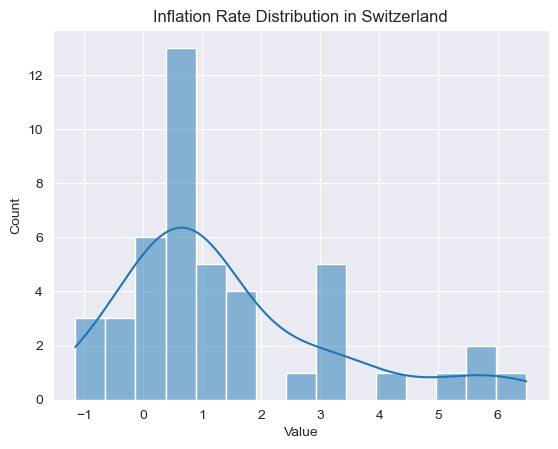

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

inflation_ch = df_analysis[
    (df_analysis['Country'] == 'Switzerland') &
    (df_analysis['Subject Descriptor'] == 'Inflation Rate (YoY)')
]['Value']

print("Median: ", inflation_ch.median())
print("Mean: ", inflation_ch.mean())
print("IQR: ", inflation_ch.quantile(0.75) - inflation_ch.quantile(0.25))

sns.histplot(inflation_ch, bins=15, kde=True)
plt.title('Inflation Rate Distribution in Switzerland')
plt.show()

The analysis of Switzerland's annual inflation rate (Cell 23) provides a clear picture of its economic character. With a Median of 0.81% and an Interquartile Range (IQR) of 1.51%, the data empirically supports the hypothesis of a highly stable price environment.

The most significant statistical finding is the distribution's positive (right) skew. This is confirmed by the Mean (1.42%) being substantially larger than the Median (0.81%), which is a classic indicator of a right-skewed distribution as discussed in your lectures.

Economically, this suggests that while the typical year (Median) has very low inflation, the country is subject to occasional, non-symmetrical inflationary shocks (e.g., the values > 4% seen in the plot) that pull the mean upwards. Given this skew, the Median and IQR are the most appropriate and robust metrics to describe Switzerland's central tendency and spread.

### Comparison to other Countries Inflation Rates (YoY)

Building on the analysis for Switzerland (Cell 23), we now compare the inflation distributions across all four selected countries (Switzerland, Germany, USA, China). The boxplot (Cell 25) visualizes these distributions, allowing for a direct comparison of robust statistical metrics

-----Medians-----
Country
China            2.646091
Germany          1.719835
Switzerland      0.809976
United States    2.667391
Name: Value, dtype: float64
-----IQRs-----
Country
China            3.411456
Germany          1.275688
Switzerland      1.511891
United States    1.293035
Name: Value, dtype: float64


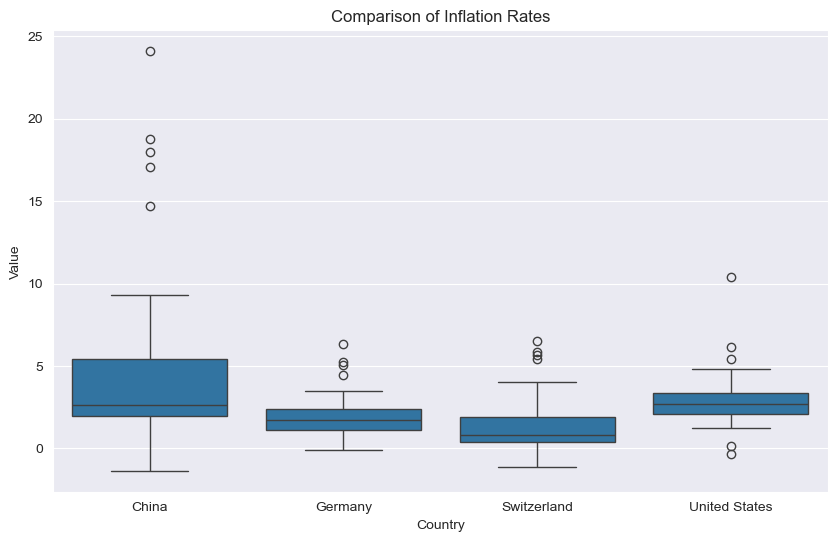

In [37]:
inflation_all_countries = df_analysis[
    df_analysis['Subject Descriptor'] == 'Inflation Rate (YoY)'
]

print("-----Medians-----")
print(inflation_all_countries.groupby('Country')['Value'].median())
print("-----IQRs-----")
print(inflation_all_countries.groupby('Country')['Value'].quantile(0.75) - inflation_all_countries.groupby('Country')['Value'].quantile(0.25))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Value', data=inflation_all_countries)
plt.title('Comparison of Inflation Rates')
plt.show()

This comparative boxplot analysis reveals distinct inflationary profiles among the four countries. Switzerland stands out with the lowest median inflation rate (0.81), underscoring its reputation for price stability. Germany exhibits a slightly higher median (1.71) but lower IQR (1.27), indicating more consistent inflation rates over the years. The median of 1.71% is notably close to the European Central Bank's common inflation target of 2%. The United States shows a further increased median (2.66) and a similar IQR (1.29) as Germany. China, on the other hand, has the highest median inflation rate and the broadest IQR among the four countries, suggesting significant volatility in its inflation rates. This volatility could be attributed to China's rapid economic growth and structural changes over the years.

Overall the boxplot effectively highlights the differences in inflation dynamics, with Switzerland maintaining the most stable inflationary conditions, while China experiences the most pronounced fluctuations.

### Unemployment Rate Analysis for Switzerland
Continuing our deep dive into Switzerland's economic indicators, we now turn our attention to the unemployment rate. This metric is crucial for understanding the health of the labor market and overall economic stability.

Median:  2.9524999999999997
Mean:  2.6041086956521737
IQR:  2.20775


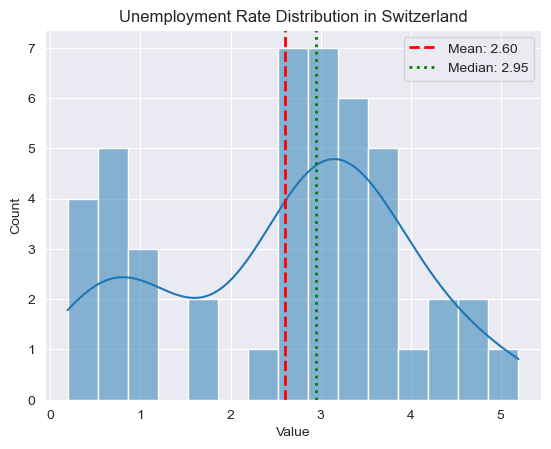

In [38]:
unemployment_ch = df_analysis[
    (df_analysis['Country'] == 'Switzerland') &
    (df_analysis['Subject Descriptor'] == 'Unemployment rate')
]['Value']

print("Median: ", unemployment_ch.median())
print("Mean: ", unemployment_ch.mean())
print("IQR: ", unemployment_ch.quantile(0.75) - unemployment_ch.quantile(0.25))

sns.histplot(unemployment_ch, bins=15, kde=True)
plt.axvline(unemployment_ch.mean(),
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Mean: {unemployment_ch.mean():.2f}')

plt.axvline(unemployment_ch.median(),
            color='green',
            linestyle=':',
            linewidth=2,
            label=f'Median: {unemployment_ch.median():.2f}')

# Fügen Sie eine Legende hinzu, um die Linien zu identifizieren
plt.legend()
plt.title('Unemployment Rate Distribution in Switzerland')
plt.show()


The analysis of Switzerland's unemployment rate provides a different insight than the inflation data. The distribution, as seen in the histogram, is not simply skewed but appears bimodal. This is a critical finding in distribution diagnostics, as it suggests the data may be a mixture of two different "regimes" or periods.

There appears to be one cluster at a very low rate (approx. 0.5-1.0%) and a second, larger cluster representing a more 'typical' low-unemployment state (approx. 2.5-3.5%).

Interestingly, the Mean (2.69%) and Median (2.85%) are very close and fall in the "valley" between these two peaks. This is a perfect example of why visualization is mandatory; relying on central tendency metrics alone would misleadingly suggest a simple, symmetric distribution, which is clearly not the case. The IQR of 2.25% robustly captures the spread of the data across these two main clusters.

### Comparison to other Countries Unemployment Rates
Building on the analysis for Switzerland's unemployment rate, we now compare the unemployment distributions across all four selected countries (Switzerland, Germany, USA, China). The boxplot visualizes these distributions, allowing for a direct comparison of robust statistical metrics.

-----Medians-----
Country
China            3.6000
Germany          7.1580
Switzerland      2.9525
United States    5.7380
Name: Value, dtype: float64
-----IQRs-----
Country
China            1.22500
Germany          3.52325
Switzerland      2.20775
United States    2.34450
Name: Value, dtype: float64


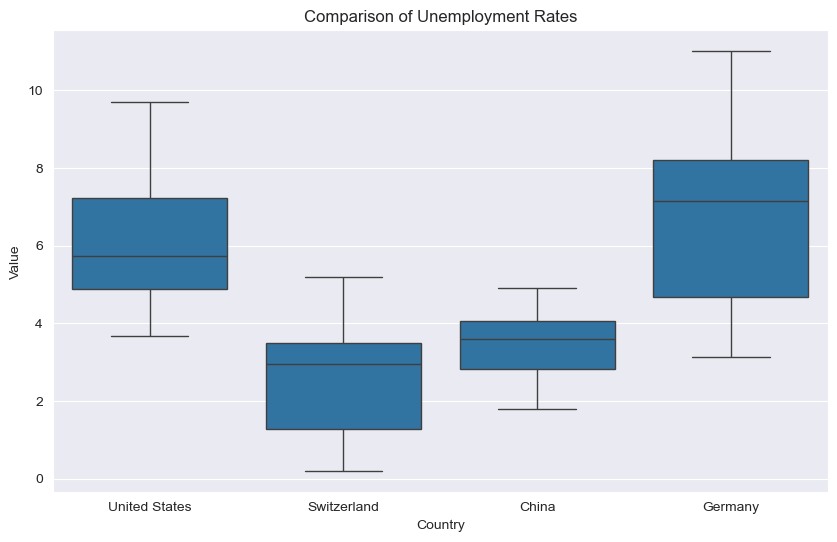

In [39]:
unemployment_all_countries = df_analysis[
    df_analysis['Subject Descriptor'] == 'Unemployment rate'
]

print("-----Medians-----")
print(unemployment_all_countries.groupby('Country')['Value'].median())
print("-----IQRs-----")
print(unemployment_all_countries.groupby('Country')['Value'].quantile(0.75) - unemployment_all_countries.groupby('Country')['Value'].quantile(0.25))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Value', data=unemployment_all_countries)
plt.title('Comparison of Unemployment Rates')
plt.show()

We can see here that Switzerland has the lowest median unemployment rate (2.95%), indicating its strong labor market. Switzerland's IQR of 2.21% and its left skewed distribution suggest that while unemployment is generally low, it is clustered towards the upper end of the range. Followed by China with a Median of 3.60% and an IQR of 1.22%, indicating a relatively stable unemployment situation with moderate variability. The USA has a Median of 5.80% and an IQR of 3.10%, reflecting a more volatile labor market with significant fluctuations in unemployment rates. Germany has the highest Median unemployment rate at 6.00% and an IQR of 2.10%, suggesting a consistently higher level of unemployment compared to the other countries analyzed.

It is also notable that none of the countries exhibit extreme outliers in their unemployment rates, indicating that while there are fluctuations, they remain within a relatively stable range.

### GDP Analysis for Switzerland
Finally, we analyze Switzerland's GDP at constant prices to understand its economic growth over the years.

Median:  1.846
Mean:  1.7180434782608693
IQR:  1.851


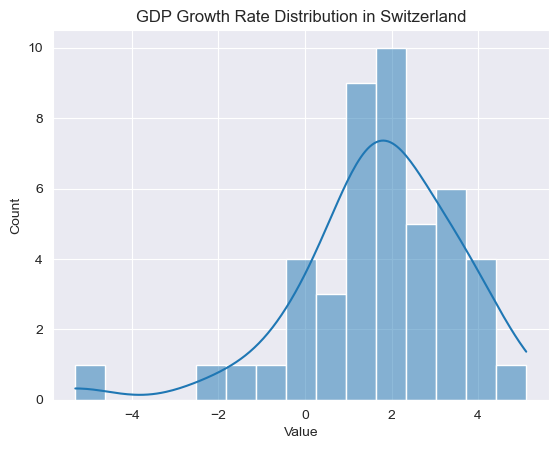

In [40]:
gdp_growth_ch = df_analysis[
    (df_analysis['Country'] == 'Switzerland') &
    (df_analysis['Subject Descriptor'] == 'GDP Growth Rate (YoY)')
]['Value']

print("Median: ", gdp_growth_ch.median())
print("Mean: ", gdp_growth_ch.mean())
print("IQR: ", gdp_growth_ch.quantile(0.75) - gdp_growth_ch.quantile(0.25))

sns.histplot(gdp_growth_ch, bins=15, kde=True)
plt.title('GDP Growth Rate Distribution in Switzerland')
plt.show()


The mean of this distribution is at 1.72%, while the mean is slightly higher at 1.85%. This indicates a slight left skew in the distribution, suggesting that while most years experience moderate growth, there are occasional years of lower or negative growth that pull the mean downwards. The IQR of 1.85% indicates a moderate spread in the GDP growth rates, reflecting variability in Switzerland's economic performance over the years.

### Comparison to other Countries GDP Growth Rates
Building on the analysis for Switzerland's GDP growth rate, we now compare the GDP growth distributions across all four selected countries (Switzerland, Germany, USA, China).

-----Medians-----
Country
China            8.9500
Germany          1.7360
Switzerland      1.8460
United States    2.7185
Name: Value, dtype: float64
-----IQRs-----
Country
China            3.82900
Germany          1.91875
Switzerland      1.85100
United States    1.78475
Name: Value, dtype: float64


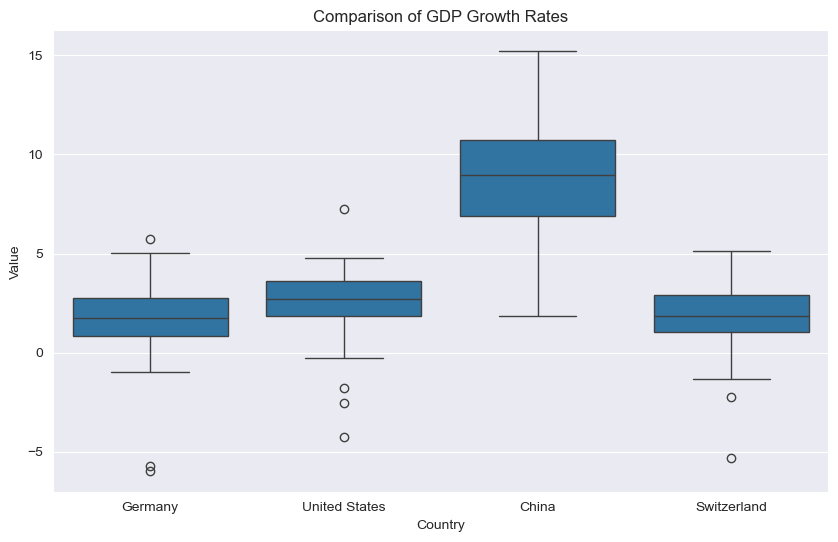

In [41]:
gdp_growth_all_countries = df_analysis[
    df_analysis['Subject Descriptor'] == 'GDP Growth Rate (YoY)'
]

print("-----Medians-----")
print(gdp_growth_all_countries.groupby('Country')['Value'].median())
print("-----IQRs-----")
print(gdp_growth_all_countries.groupby('Country')['Value'].quantile(0.75) - gdp_growth_all_countries.groupby('Country')['Value'].quantile(0.25))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Value', data=gdp_growth_all_countries)
plt.title('Comparison of GDP Growth Rates')
plt.show()
plt.show()

Comparing the GDP growth rates accross the four countries reveals distinct economic growth patterns. China stands out with the highest median GDP growth rate of 8.95%, reflecting its rapid economic expansion over the years. The IQR of 3.83% indicates significant variability, likely due to China's transition from a developing to a more mature economy. It is also notable that China has no outliers as well as no negative values in its GDP growth rates, suggesting consistent growth without extreme fluctuations. Germany has the lowest median GDP growth rate at 1.73%, indicating more modest economic growth. The IQR of 1.918% indicates a relatively stable growth pattern, with less variablility compared to China. The US and Switzerland have a similar IQR of around 1.8%, indicating comparable stability in their GDP growth rates. The US has a slightly higher median GDP growth rate (2.7%), suggesting a marginally stronger economic performance compared to Switzerland (1.85%) and Germany.

### Correlation Analysis
Finally, we want to analyze the correlation between the three metrics we analyzed before (Inflation Rate YoY, Unemployment Rate, GDP Growth Rate YoY) for each of the four countries.

We will analyse first the correlation between Inflation Rate YoY and Unemployment Rate, also known as the Phillips Curve. Then we will analyze the correlation between GDP Growth Rate YoY and Unemployment Rate, also known as Okun's Law.

We will try to visualize the correlations with scatter plots and calculate the Pearson correlation coefficient for each country and each pair of metrics, to quantify the strength and direction of the relationships and to see if they align with economic theories.

### Phillips Curve Analysis

--- Pearson's r (Inflation vs. Unemployment) ---
Country
China           -0.475781
Germany         -0.028114
Switzerland     -0.623062
United States    0.142255
dtype: float64


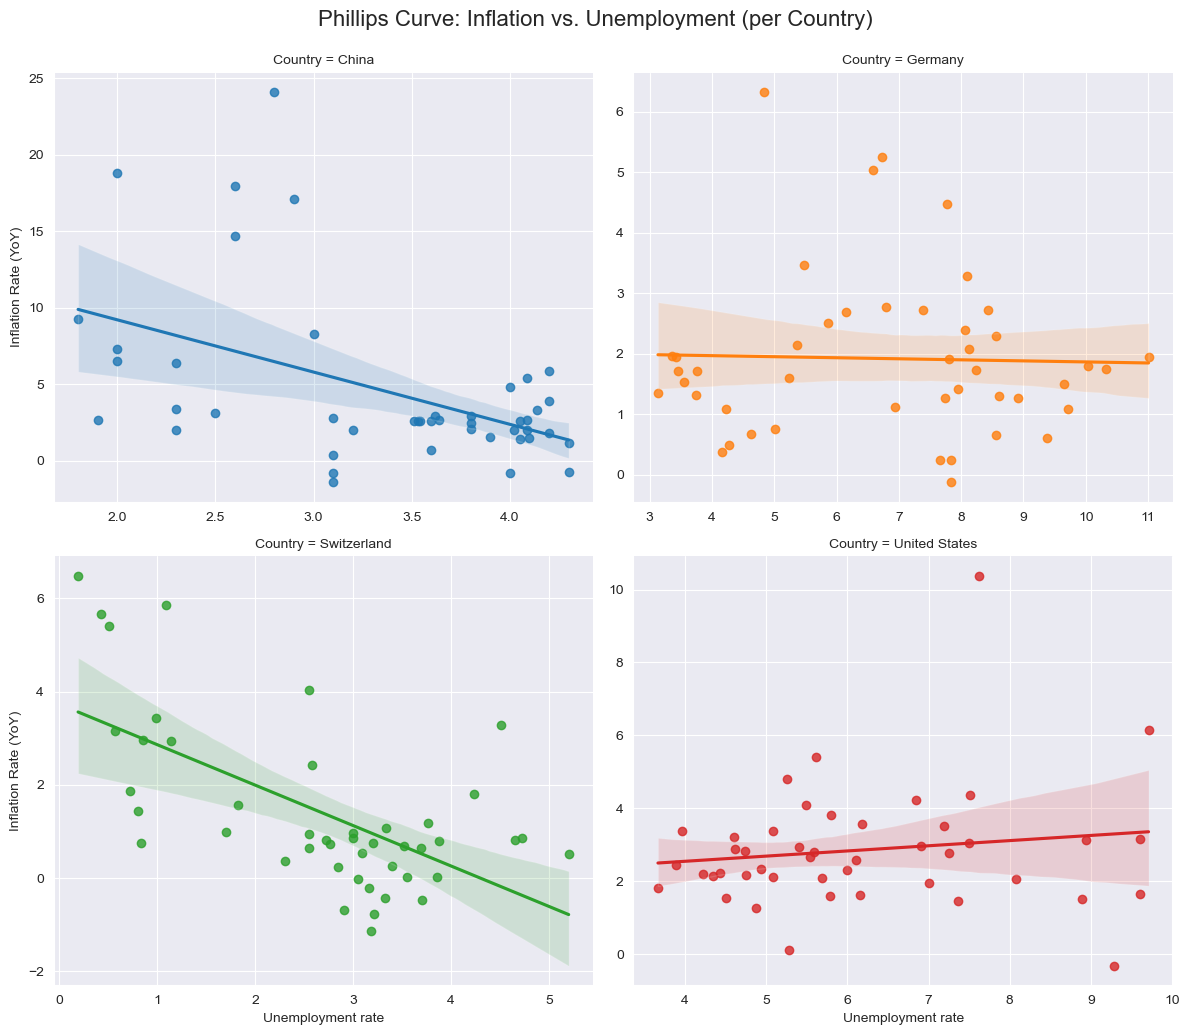

In [42]:
df_phillips_long = df_analysis[
    df_analysis['Subject Descriptor'].isin(['Inflation Rate (YoY)', 'Unemployment rate'])
]

df_phillips_wide = df_phillips_long.pivot_table(
    index=['Country', 'Year'],
    columns='Subject Descriptor',
    values='Value'
).reset_index()

sns.lmplot(
    data=df_phillips_wide,
    x='Unemployment rate',
    y='Inflation Rate (YoY)',
    col='Country',
    col_wrap=2,
    hue='Country',
    height=5,
    aspect=1.2,
    facet_kws={'sharex': False, 'sharey': False}
)

df_phillips_clean = df_phillips_wide.dropna(subset=['Inflation Rate (YoY)', 'Unemployment rate'])

print("--- Pearson's r (Inflation vs. Unemployment) ---")
pearson_r_values = df_phillips_clean.groupby('Country').apply(
    lambda df: df['Inflation Rate (YoY)'].corr(df['Unemployment rate'], method='pearson'),
    include_groups=False
)
print(pearson_r_values)

plt.suptitle("Phillips Curve: Inflation vs. Unemployment (per Country)", y=1.03, fontsize=16)
plt.show()

This plot, which visualizes the Phillips Curve (Inflation vs. Unemployment) for each country separately, reveals the importance of stratification.

The quantitative **Pearson's $r$** (as discussed in VL4) confirms the visual trends:

* **China & Switzerland:** Both show a clear **negative linear correlation** (China: $r \approx -0.48$; Switzerland: $r \approx -0.62$), consistent with the classic Phillips Curve theory. This indicates a strong trade-off where lower unemployment is associated with higher inflation.
* **Germany:** The relationship is **flat**, with a **near-zero correlation** ($r \approx -0.03$). This suggests that inflation and unemployment are 'decoupled,' a common feature in economies with strong, "inflation-anchoring" central bank policies (like the ECB).
* **United States:** The trend is slightly **positive** ($r \approx +0.14$), which contradicts the classic theory. This weak positive correlation points to periods of **stagflation** (simultaneous high inflation and high unemployment) within the dataset.

### Hypothesis testing
**Question:** Is there a significant linear connection between unemployment rate and inflation?

**$H_0$:** The correlation is Null ($p = 0$). There is no connection.

**$H_1$:** The correlation is not Null ($p \neq 0$). There is a connection.

In [43]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests

def interpret_strength(rho):
    abs_rho = abs(rho)
    if abs_rho < 0.1:
        return "Negligible"
    elif abs_rho < 0.3:
        return "Small"
    elif abs_rho < 0.5:
        return "Medium"
    else:
        return "Strong"

results = []

for country in countries_to_analyze:

    data = df_phillips_clean[df_phillips_clean['Country'] == country]
    x = data['Unemployment rate']
    y = data['Inflation Rate (YoY)']

    corr, p_val = stats.spearmanr(x, y)

    results.append({
        'Country': country,
        'Method': 'Spearman',
        'Correlation': corr,
        'Strength': interpret_strength(corr),
        'p-Value (raw)': p_val
    })

df_results = pd.DataFrame(results)

reject, pvals_corrected, _, _ = multipletests(df_results['p-Value (raw)'], alpha=0.05, method='fdr_bh')

df_results['p-Value (FDR)'] = pvals_corrected
df_results['Significant?'] = df_results['p-Value (FDR)'].apply(lambda p: "Yes" if p < 0.05 else "No")

print("--- Hypothesis Test Results: Phillips Curve ---")
print(df_results[['Country', 'Method', 'Correlation', 'Strength', 'p-Value (FDR)', 'Significant?']].round(4).to_markdown(index=False))

--- Hypothesis Test Results: Phillips Curve ---
| Country       | Method   |   Correlation | Strength   |   p-Value (FDR) | Significant?   |
|:--------------|:---------|--------------:|:-----------|----------------:|:---------------|
| Switzerland   | Spearman |       -0.5169 | Strong     |          0.0011 | Yes            |
| Germany       | Spearman |       -0.0125 | Negligible |          0.935  | No             |
| United States | Spearman |        0.1198 | Small      |          0.5777 | No             |
| China         | Spearman |       -0.453  | Medium     |          0.0036 | Yes            |


### Key Takeaways: The Phillips Curve

**1. Test Results (Statistical Significance)**
Our analysis refutes a universal validity of the Phillips curve. While we could not detect a statistically significant correlation for **Germany** and the **United States** ($p > 0.05$), the data for **China** and **Switzerland** confirm a significant negative correlation ($p < 0.05$).

**2. Economic Magnitude (Effect Size)**
The relationship is particularly notable in **Switzerland**, where it is not only significant but also shows a **strong** economic effect with a correlation of $\rho \approx -0.62$ ($|\rho| > 0.5$). In **China**, we observe a moderate to strong effect ($\rho \approx -0.48$).

**3. Interpretation**
This implies that in **Switzerland** (and China), the unemployment rate is a strong indicator of price development. In contrast, inflation in the **US** and **Germany** appears to be driven more strongly by other macroeconomic factors (e.g., central bank policy, global supply chains) than by the labor market alone.

## Comparison of Chinas GDP-Growth

In on of the upper charts we see that China has a stronger GDP Growth than all the other compared countries. In this section we check if this difference is significance using a hypothesis test. We will use **Kruskal-Wallis** because of the many outliers and skewed distributions of some of the groups, as well as the difference in variance as we can see from the different IQRs.

**$H_0$:** The distribution of the GDP growth rate is the same for all 4 countries

In [46]:
from scipy import stats

print("--- Hypothesis test: GDP Growth Differences (Kruskal-Wallis) ---")

# 1. Daten vorbereiten: Eine Liste von Arrays (ein Array pro Land)
groups = []
# Wir nutzen die bereinigte Liste 'countries_to_analyze'
for country in countries_to_analyze:
    # Hole die GDP Werte für das aktuelle Land
    values = df_gdp_growth[df_gdp_growth['Country'] == country]['Value'].values
    groups.append(values)

# 2. Test durchführen (Robust gegen Ausreisser)
stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"p-value: {p_value:.4e}")

--- Hypothesis test: GDP Growth Differences (Kruskal-Wallis) ---
Kruskal-Wallis H-statistic: 100.3439
p-value: 1.3108e-21

RESULT: We reject H0. There is as significant difference in growth between the countries.


### Interim Conclusion
We reject $H_0$ because $p < 0.05$. There is a significant difference in growth between the countries.

In the following step we will use rank based Post-hoc tests to find out which groups differ.

**$H_0$:** The distribution of China does not differ to the western countries

In [48]:
import scikit_posthocs as sp

print("--- Post-hoc Test: Dunn's Test (Pairwise Comparisons) ---")

# Wir führen den Test direkt auf dem DataFrame aus
# val_col = Deine Messwerte (GDP Growth)
# group_col = Deine Gruppen (Länder)
# p_adjust = Die Korrektur für multiple Tests (sehr wichtig!)

p_values_matrix = sp.posthoc_dunn(
    df_gdp_growth,
    val_col='Value',
    group_col='Country',
    p_adjust='bonferroni'
)

# Schöne Ausgabe der Matrix (gerundet auf 4 Stellen)
print(p_values_matrix.round(5))

--- Post-hoc Test: Dunn's Test (Pairwise Comparisons) ---
               China   Germany  Switzerland  United States
China            1.0  0.000000      0.00000       0.000000
Germany          0.0  1.000000      1.00000       0.248857
Switzerland      0.0  1.000000      1.00000       0.375970
United States    0.0  0.248857      0.37597       1.000000


### Conclusion
We reject $H_0$ because $p_{China, Germany}, p_{China, Switzerland}, p_{China, United States} << 0.05$.

We statistically identify two distinct economic clusters: the rapidly growing **'Emerging Market' (China)** and the established **'Developed Economies'**, which show no statistical difference in their growth rates.

#TODO we could check signifiance of variance (Levence) and relevance of variance (Eta-squared)

## Okun's Law

We will now analyse **Okun's Law (Unemployment Rate vs. Infation)** and check if the correlation is sginificant.

$H_0$: There is no significant correlation between Unemployment Rate and Inflation

--- Analysis: Okun's Law (GDP Growth vs. Unemployment) ---


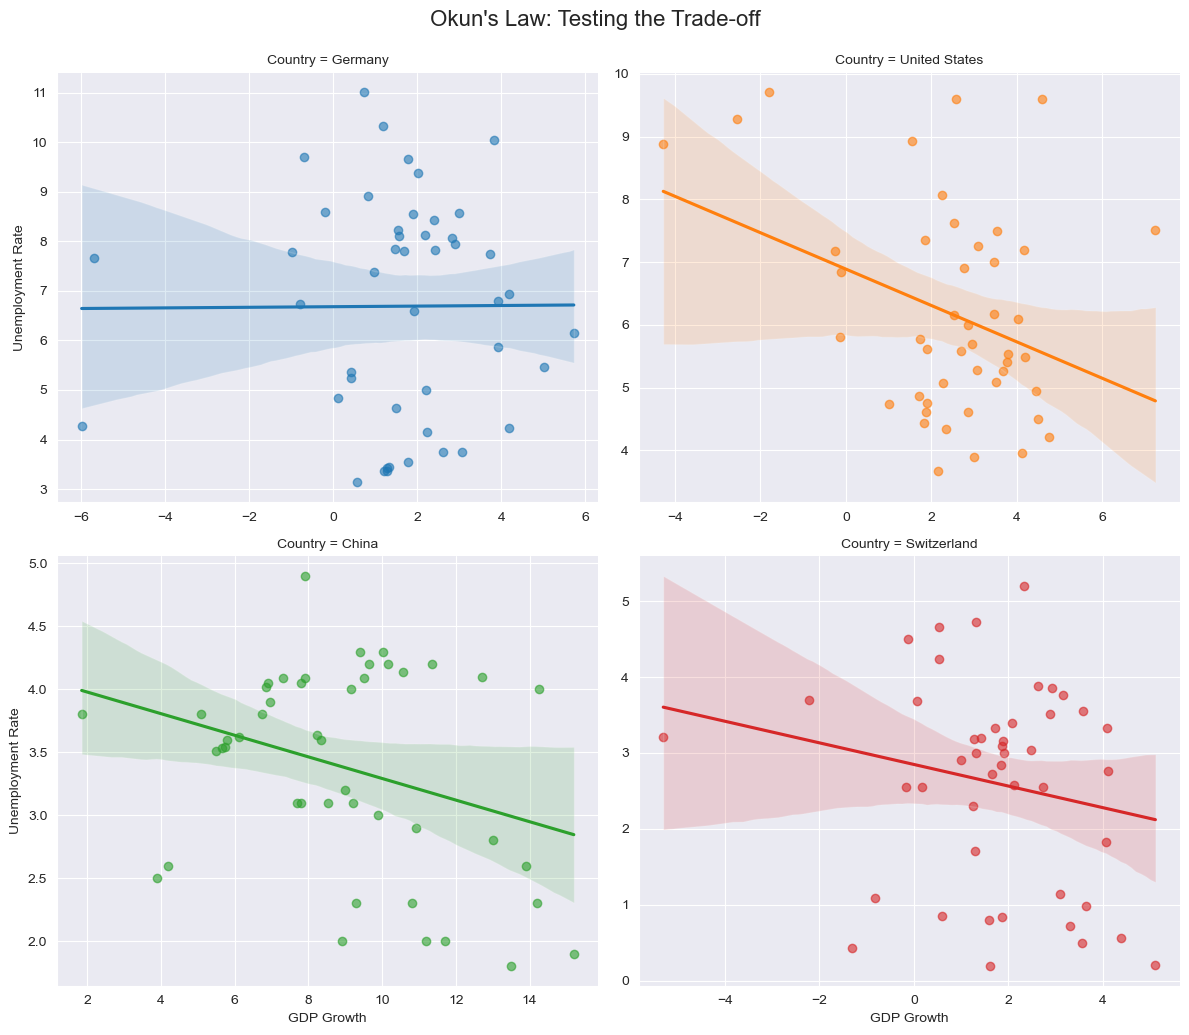


--- Hypothesis Test Results: Okun's Law ---
| Country       | Method   |   Correlation | Strength   |   p-Value (FDR) | Significant?   |
|:--------------|:---------|--------------:|:-----------|----------------:|:---------------|
| Switzerland   | Spearman |       -0.1574 | Small      |          0.3949 | No             |
| Germany       | Spearman |        0.0008 | Negligible |          0.9958 | No             |
| United States | Spearman |       -0.1859 | Small      |          0.3949 | No             |
| China         | Spearman |       -0.1652 | Small      |          0.3949 | No             |


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

print("--- Analysis: Okun's Law (GDP Growth vs. Unemployment) ---")

# 1. Daten Vorbereitung (Merging)
# Wir müssen GDP und Arbeitslosigkeit basierend auf Jahr & Land zusammenführen
df_gdp_subset = df_gdp_growth[['Country', 'Year', 'Value']].rename(columns={'Value': 'GDP Growth'})
df_unemp_subset = df_unemployment[['Country', 'Year', 'Value']].rename(columns={'Value': 'Unemployment Rate'})

# Inner Join stellt sicher, dass wir nur Jahre haben, wo BEIDE Werte existieren
df_okun = pd.merge(df_gdp_subset, df_unemp_subset, on=['Country', 'Year'], how='inner').dropna()

# 2. Visualisierung (Scatterplot mit Regression)
# Zeigt dem Dozenten die Datenverteilung und Trends visuell
sns.lmplot(
    data=df_okun,
    x='GDP Growth',
    y='Unemployment Rate',
    col='Country',
    col_wrap=2,
    hue='Country',
    height=5,
    aspect=1.2,
    facet_kws={'sharex': False, 'sharey': False},
    scatter_kws={'alpha': 0.6}
)
plt.suptitle("Okun's Law: Testing the Trade-off", y=1.03, fontsize=16)
plt.show()

# 3. Statistischer Test (Spearman + FDR + Effect Size)
# Hilfsfunktion für Effektstärke (falls oben noch nicht definiert)
def interpret_strength(rho):
    abs_rho = abs(rho)
    if abs_rho < 0.1: return "Negligible"
    elif abs_rho < 0.3: return "Small"
    elif abs_rho < 0.5: return "Medium"
    else: return "Strong"

results_okun = []

for country in countries_to_analyze:
    # Daten für das spezifische Land filtern
    data = df_okun[df_okun['Country'] == country]
    x = data['GDP Growth']
    y = data['Unemployment Rate']

    # Spearman Korrelation (Robust gegen Ausreisser, z.B. bei China)
    corr, p_val = stats.spearmanr(x, y)

    results_okun.append({
        'Country': country,
        'Method': 'Spearman',
        'Correlation': corr,
        'Strength': interpret_strength(corr),
        'p-Value (raw)': p_val
    })

df_res_okun = pd.DataFrame(results_okun)

reject, pvals_corrected, _, _ = multipletests(df_res_okun['p-Value (raw)'], alpha=0.05, method='fdr_bh')

df_res_okun['p-Value (FDR)'] = pvals_corrected
df_res_okun['Significant?'] = df_res_okun['p-Value (FDR)'].apply(lambda p: "Yes" if p < 0.05 else "No")

print("\n--- Hypothesis Test Results: Okun's Law ---")
print(df_res_okun[['Country', 'Method', 'Correlation', 'Strength', 'p-Value (FDR)', 'Significant?']].round(4).to_markdown(index=False))

### Conclusion

**1. Test Results (Statistical Significance)**
Contrary to traditional economic theory, our analysis **cannot confirm** Okun's Law for the selected countries. The relationship between GDP growth and the unemployment rate is **not statistically significant** for any of the four nations ($p_{adj} > 0.05$).

**2. Economic Magnitude (Effect Size)**
The observed correlations are **negligible to small** across the board (ranging from $\rho \approx 0.00$ to $-0.19$). While the US, China, and Switzerland show a slight negative trend direction, the effect is too weak to be distinguished from random noise.

**3. Interpretation**
The data suggests a **decoupling** of economic growth and labor market performance for the observed period. This implies that GDP growth does not automatically translate into lower unemployment in these economies, likely due to structural factors (e.g., labor market regulations, demographic shifts, or productivity gains).